# Исследование рынка компьютерных игр и игровых платформ

В данной работе нам предстоит проанализировать рынок компьютерных игр с начала 80-х годов. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Нам необходимо выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

В первую очередь мы подготовим данные для дальнейшей аналитической работы с ними. Далее рассмотрим, как часто выпускались игры с 1980-го года, какие жанры преобладали среди пользователей, какие платформы стали самыми популярными, выявим закономерности, определяющие успешность игры, а также составим портрет пользователя для каждого региона.

По итогу работы мы сможем ответить на такие вопросы, как: "Какая платформа наиболее распространена среди населения?", "Какой самый популярный жанр игр?", "Отличаются ли эти показатели в разных уголках планеты?" и другие.

**План проекта:**

1. [Загрузка и описание данных](#Загрузка-и-описание-данных)
2. [Предобработка данных](#Предобработка-данных)
    1. [Устранение пропусков](#Устранение-пропусков)
    2. [Изменение типов данных](#Изменение-типов-данных)
    3. [Добавление нового столбца](#Добавление-нового-столбца)
    4. [Вывод](#Вывод)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    1. [Анализ выпускаемых игр](#Анализ-выпускаемых-игр)
    2. [Анализ игровых платформ](#Анализ-игровых-платформ)
    3. [Влияние отзывов на продажи внутри платформ](#Влияние-отзывов-на-продажи-внутри-платформ)
4. [Портрет пользователя в каждом регионе](#Портрет-пользователя-в-каждом-регионе)
    1. [Самые популярные платформы](#Самые-популярные-платформы)
    2. [Самые популярные жанры](#Самые-популярные-жанры)
    3. [Самые распространенные рейтинги игр](#Самые-распространенные-рейтинги-игр)
5. [Проверка гипотез](#Проверка-гипотез)
    1. [Первая гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC равны](#Первая-гипотеза.-Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-равны)
    2. [Вторая гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные](#Вторая-гипотеза.-Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные)
6. [Общие выводы](#Общие-выводы)

**Описание данных:**
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка и описание данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np

plt.rcParams["figure.figsize"] = (13,8)

In [2]:
# Загружаем датасет
data = pd.read_csv(r'C:\Users\ivank\practicum\datasets\games.csv')

In [3]:
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данный датафрейм состоит из 16715 строк и 11 столбцов:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Изучив информацию о датафрейме, можно сказать, что в некоторых столбцах присутствуют пропуски. Также, просмотрев названия столбцов, можно предположить, что для некоторых из них определен неверный тип данных. Эти недочеты будут исправлены на следующем этапе. Названия столбцов стоит привести к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)

## Предобработка данных

### Устранение пропусков

In [5]:
# Считаем количество пропусков
print(data.isna().sum())
print()
# Считаем количество дубликатов
print('Количество дубликатов:', data.duplicated().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество дубликатов: 0


Для начала посмотрим на строки с пропусками в названии игр и жанров, повлияет ли их удаление на дальнейшние расчеты.

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных строках нет практически никакой информации, поэтому можно их удалить. Также заполним пропуски и поставим заглушки в тех столбцах, где это возможно.

In [7]:
# Удаляем пропуски в названии игри и жанров
data.dropna(subset=['name', 'genre'], inplace=True)

# Заполняем пропуски заглушками
data['year_of_release'] = data['year_of_release'].fillna(0)

data['critic_score'] = data['critic_score'].fillna(-1)

data['user_score'] = data['user_score'].fillna(-1)

data['user_score'] = data['user_score'].replace('tbd', -1)

data['rating'] = data['rating'].fillna('unknown')

В датафрейме нет строк-дубликатов, однако есть пропуски. В основном пропуски присутствуют в четырех столбцах с информацией о годе релиза игры, оценке критиков, оценке пользователей и рейтинге игры. В датафрейме всего 2 строки с пропущенными названием и жанром игры, также в этих строках пропущена половина остальной информации, информацию в данных столбцах восстановить не получится, и это количество не критично для Датафрейма, их удаление не исказит дальнейшие расчеты.

В остальных же столбцах содержится слишком много строк, чтобы их удалять. В столбце с годом релиза пропуски будут заменены на число `0`, в дальнейшем будем иметь в виду, что это пропущенные значения и при необходимости фильтровать.
Пропуски с оценками пользователей и критиков будут заменены на техническое число `-1` (и также фильтруем это значение при анализе данных), а пропуски в рейтинге игр на значение `unknowm`.

Также, среди оценок пользователей встречается аббревиатура `tbd`, означающая, что оценка еще не определена. Поскольку фактически она означает, что оценки нет, мы можем обработать ее точно так же, как пропуск, заменив на техническое число.


### Изменение типов данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')

Изначально для данных столбцов были определены неверные типы данных. В столбцах с годом релиза и оценкой критиков все числа целые, поэтому ставим тип данных `int`. В столбце с оценками от пользователей встречаются десятичные числа, поэтому меняем тип данных на `float`. В остальных случаях типы данных определены верно.

### Добавление нового столбца

В датасете есть столбцы с суммами продаж на различных рынках, но нет столбца с общей суммой продаж. Сложим все имеющиеся продажи для этого столбца.

In [10]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Добавили в таблицу новый столбец с информацией о суммарных продажах игр во всех регионах.

### Вывод

In [11]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


**Итак, на данном этапе было сделано:**

* Устранены пропуски с помощью удаления или заполнения строк новыми значениями;
* Изменены типы данных;
* Добавлен новый столбец с суммарными продажами игр во всех регионах.

С этими обработанными и подготовленными к анализу данных мы можем двигаться дальше.

[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)

## Исследовательский анализ данных

### Анализ выпускаемых игр

Построим график, показывающий, сколько игр выходило каждый год с 1980-го года.

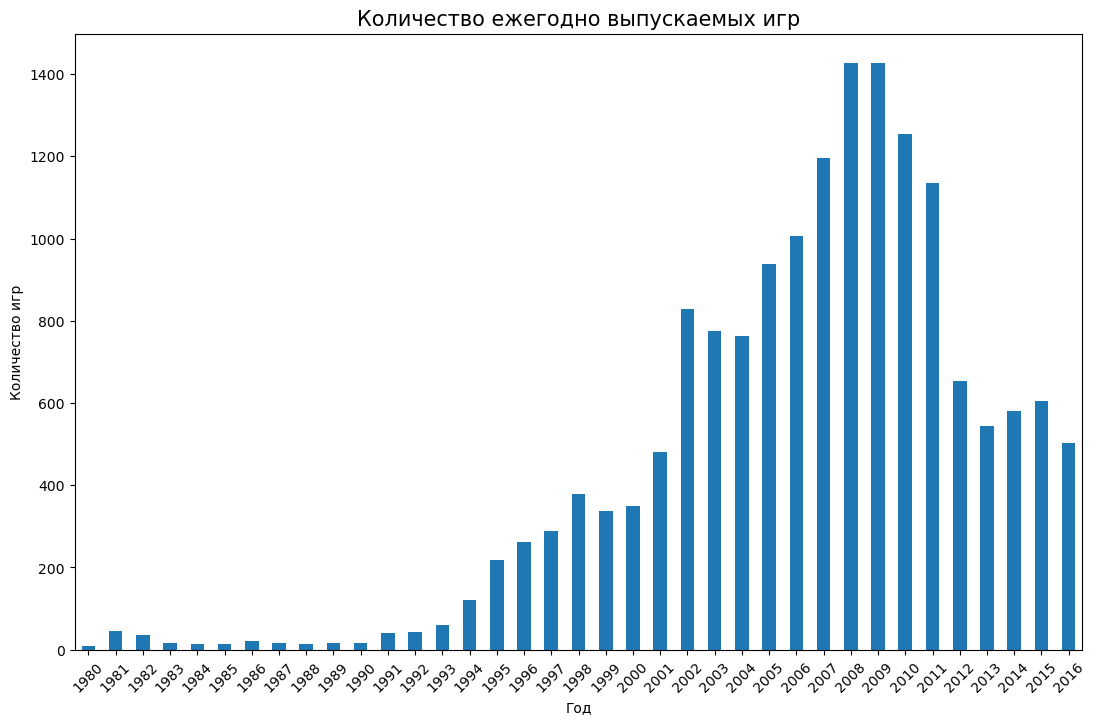

In [12]:
data.query('year_of_release != 0').pivot_table(index='year_of_release', values='name', aggfunc='count'
                ).plot(kind='bar', legend='')
plt.title('Количество ежегодно выпускаемых игр', fontsize = 15)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

На данном графике видно, что до 1994 года рынок практически не развивался и выходило очень мало игр и данные до этого года не так важны. В 1994 можно заметить плаынй рост и к 2002 году рост становится резким, количество выпускаемых игр продолжает увеличиваться. Это можно объяснить тем, что до 1994 года развитие технологий в данном направлении было недостаточным, существовавщие платформы были слабыми, игры не создавались в режиме потока, да и компьютеры были далеко не у всех. К 2002 году технологии достаточно развились и продолжали развиваться и дальше, о чем говорит дальнейший рост. Выпускалось больше игр, создавались платформы, которые могли их поддерживать и стали доступны для большинства людей.

Период с 2002 до 2011 года включительно был самым обширным на выход новых игр. С 2012 и до конца можно заметить спад. Вероятно, он обусловлен развитием мобильных игр, которые приобретали популярность в тот период, к тому же он ине учитываются в данном исследовании.

### Анализ игровых платформ

Рассмотрим, какие платформа являются наиболее популярными по количеству выпущенных игр.

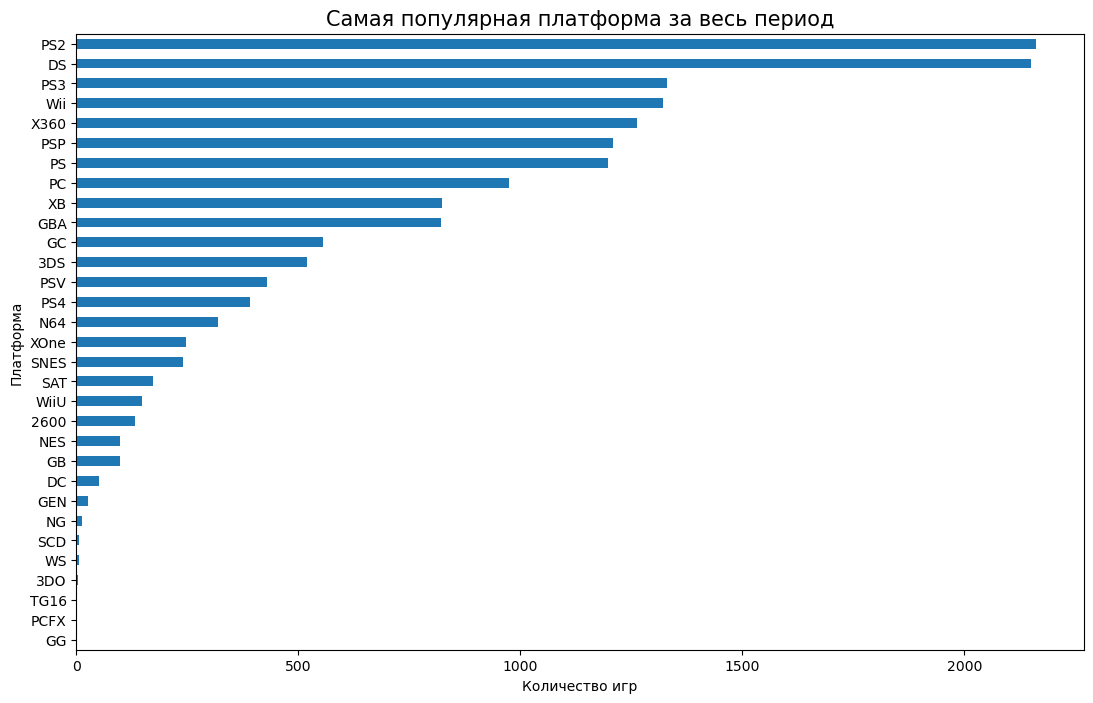

In [13]:
data.pivot_table(index='platform', values='name', aggfunc='count'
                ).sort_values(by='name').plot(kind='barh', legend='')
plt.title('Самая популярная платформа за весь период', fontsize=15)
plt.xlabel('Количество игр')
plt.ylabel('Платформа')
plt.show()

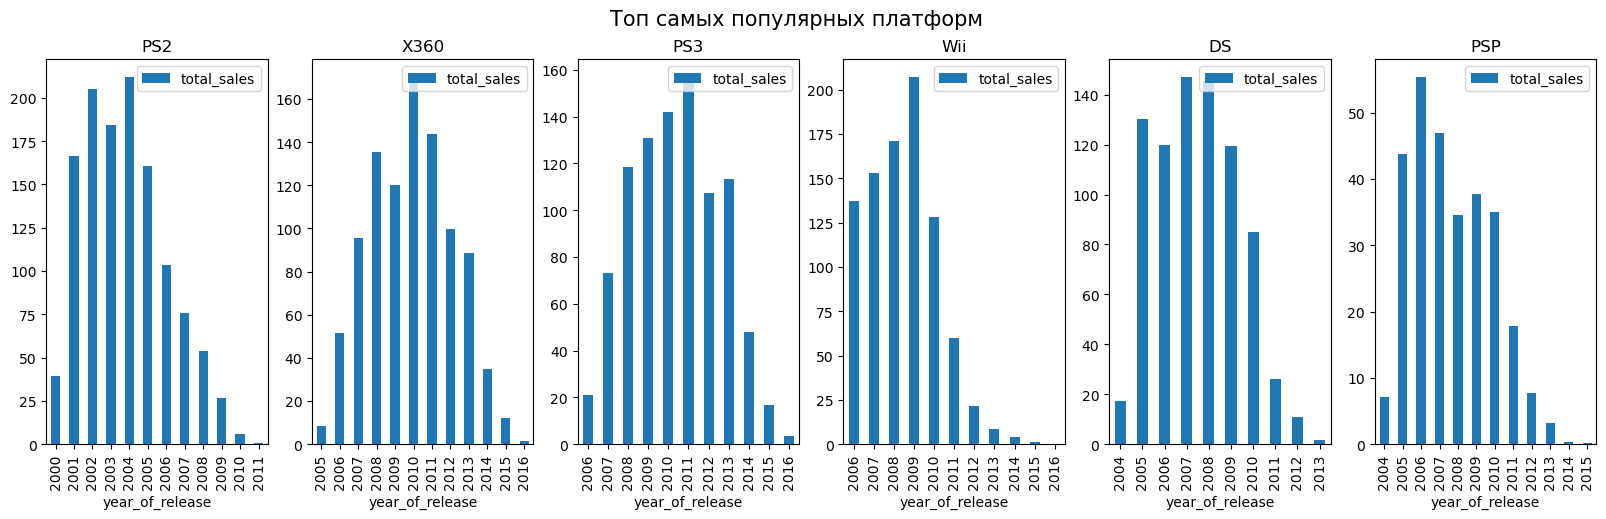

In [14]:
# Создаем список самых популярных платформ
platforms = ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PSP')

fig, ax = plt.subplots(1, len(platforms), figsize=(20,5))
for idx, platform in enumerate(platforms):
    temp = data[(data['platform'] == platform) & (data['year_of_release'] > 1990)
               ].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    temp.index = temp.index.astype(int)
    temp.plot(kind='bar', ax=ax[idx])
    ax[idx].set_title(platform)
plt.suptitle('Топ самых популярных платформ', size=15)
plt.show()

Самыми популярными платформами среди пользоваталей за весь период являются: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PSP`. По отдельным графикам для каждой платформы можно увидеть некоторую закономерность. В среднем платформа "живет" около 9-10 лет, затем ее сменяет новая. Так, к примеру, `PS2` была популярна с 2000 по 2010 год, `X360` с 2006 по 2015 и так далее.

Данная тенденция обуславливается появлением новых платформ с новыми технологиями и устареванием прежних.

Поскольку один период жизни для платформы длится около 10 лет, нам интересно посмотреть, какие платформы сейчас растут, на пике роста, или падают. Далее возьмем за основу период с 2014 года включительно.

In [15]:
data = data[data['year_of_release'] >= 2014]

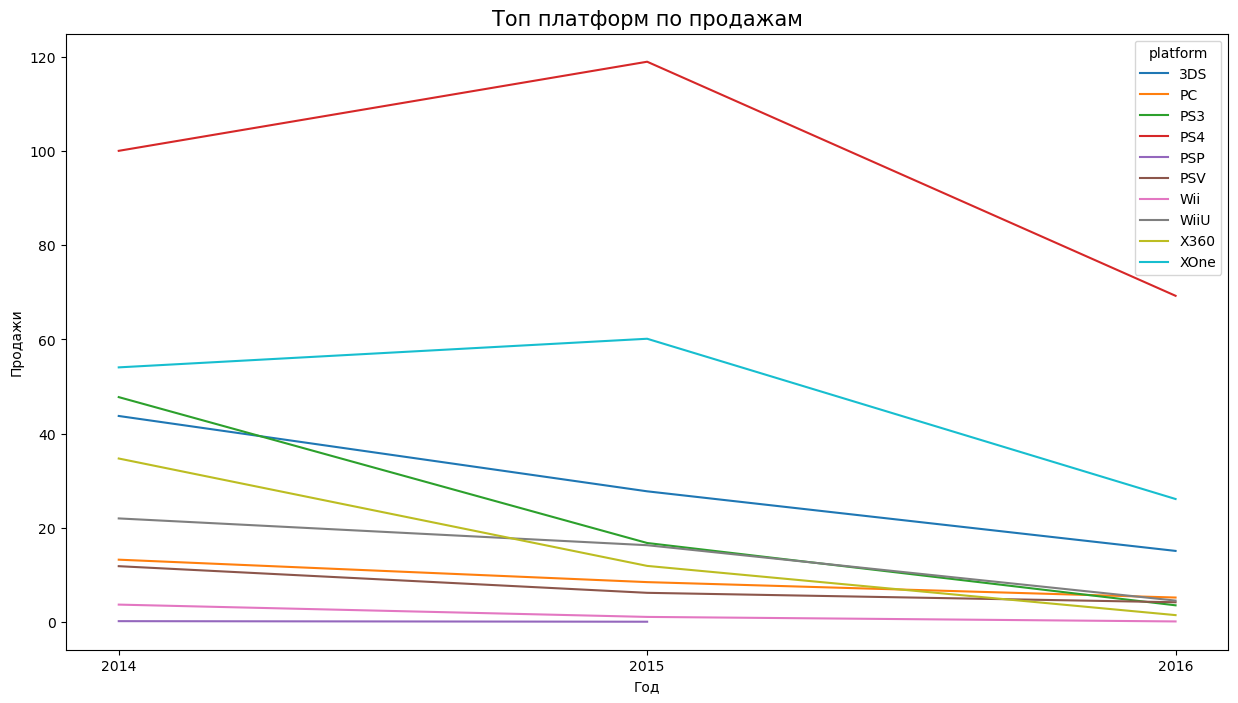

In [16]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
                ).plot(figsize=(15, 8))
plt.xticks(np.arange(2014, 2017, 1))
plt.title('Топ платформ по продажам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

На графике видно, что лидерами продаж в последние годы являются `PS4`, `XOne`, `3DS`. Касательно первых двух, продажи все еще растут и не имеют тенденции к падению роста. Также в этот список можно добавить `PC`, поскольку огромное количество пользоваталей продолжают пользоваться преимущественно компьютером.

Снижения продаж можно увидеть у платформ `PS3` и `X360`. Это можно объяснить тем, что были выпущены уже новые платформы этих серий, поэтому интерес к старым версиям упал.

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

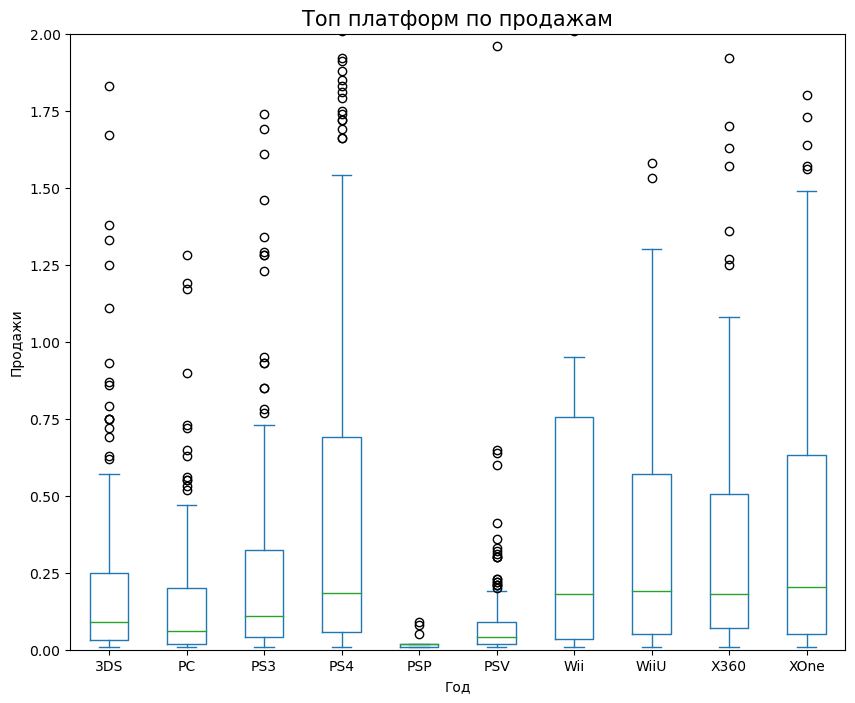

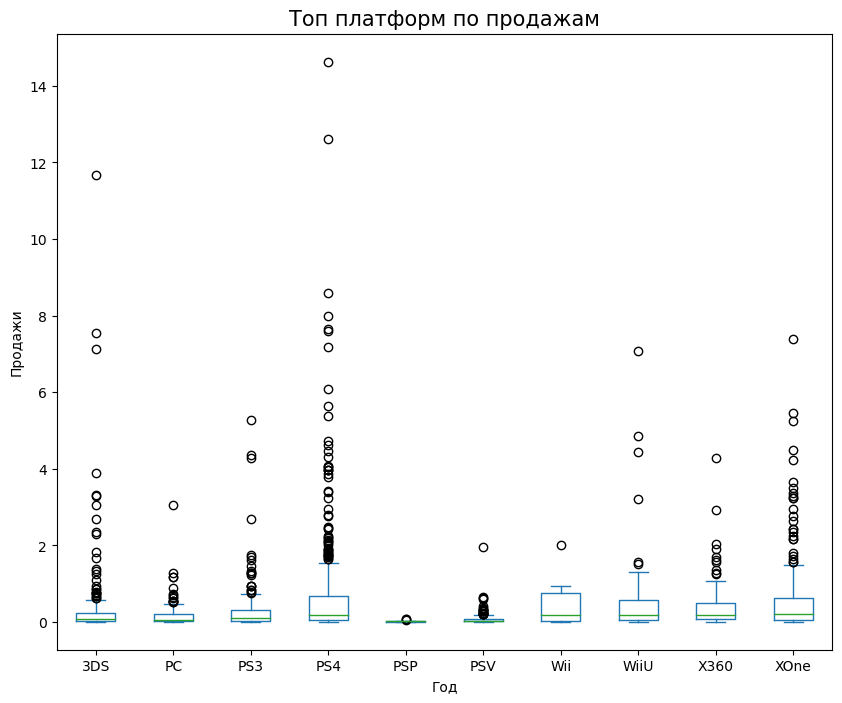

In [17]:
data.pivot_table(index='name', columns = 'platform', values = 'total_sales', aggfunc = 'sum'
                ).plot(kind='box', ylim=(0,2), figsize=(10, 8))
plt.title('Топ платформ по продажам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

data.pivot_table(index='name', columns = 'platform', values = 'total_sales', aggfunc = 'sum'
                ).plot(kind='box', figsize=(10, 8))
plt.title('Топ платформ по продажам', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Данные диаграммы размаха показывают нам количество выбросов - игры, которые принесли максимум выручки. Больше всего выбросов можно увидеть по платформам `3DS` и `PS4`.
На первой диаграмме размаха можно увидеть, что наибольшие медианные продажи приходятся на платформы `PS4` и `XOne`, хотя и выбросов у них так же много.

### Влияние отзывов на продажи внутри платформ

На примере игр на ПК разберем, есть ли взаимосвязь между оценками ползователей и критиков и продажами игр.

In [18]:
pc = data.loc[(data['platform']== "PC") & (data['critic_score'] > 0) & (data['user_score'] > 0)
             ].loc[:,['critic_score', 'user_score', 'total_sales']]

              critic_score  user_score  total_sales
critic_score      1.000000    0.466099     0.172061
user_score        0.466099    1.000000    -0.089974
total_sales       0.172061   -0.089974     1.000000


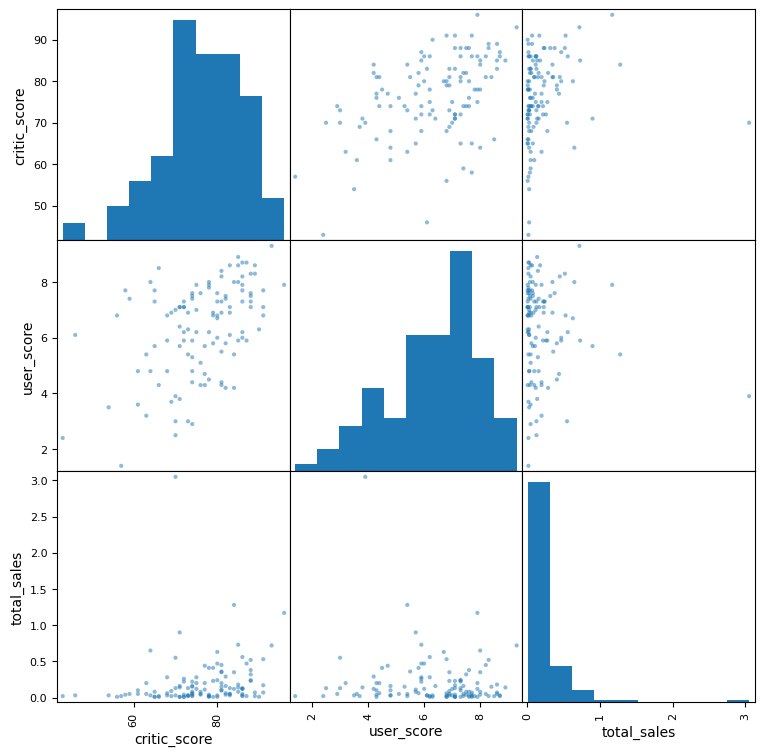

In [19]:
pd.plotting.scatter_matrix(pc, figsize=(9, 9))
print(pc.corr())

На диаграмме рассеения мы видим, что количество продаж не сильно зависит от оценок критиков, присутствует совсем малая корреляция. На графике с оценками пользователей точки расположены более хаотчно.

По коэффициентам корреляции видно, что зависимость между оценкой критиков и продажаи слабая, зависимость между оценками пользоваталей и продажами и вовсе отрицательная, но все еще она остается незначительной.

Посмотрим, как обстоят дела с другими платформами.

3DS
critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64


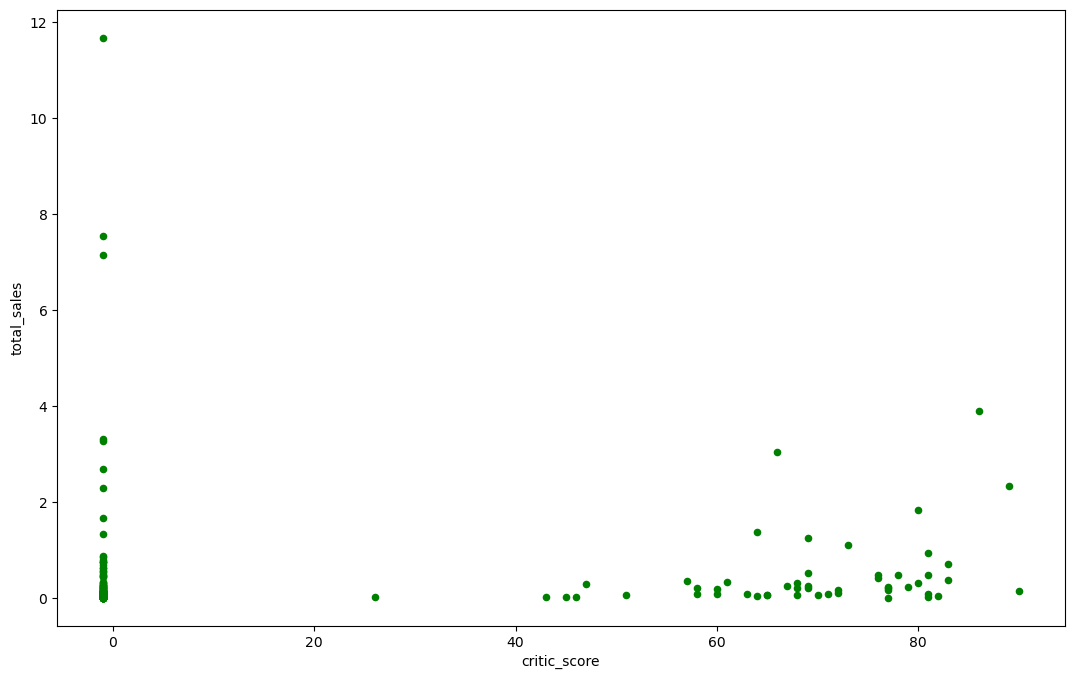

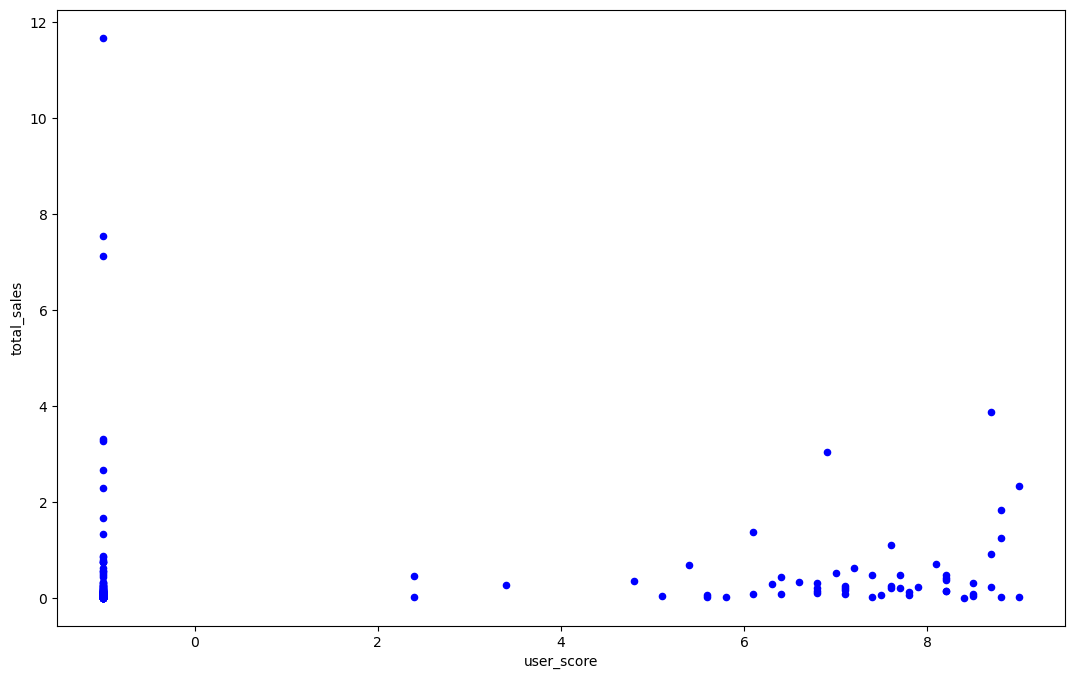

PC
critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64


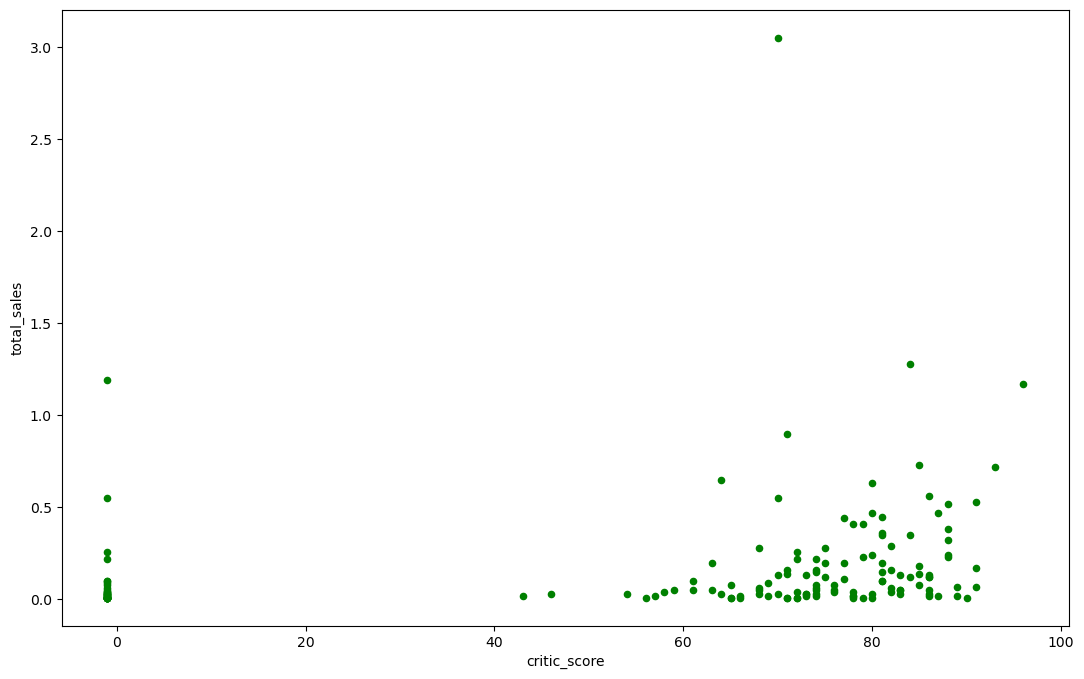

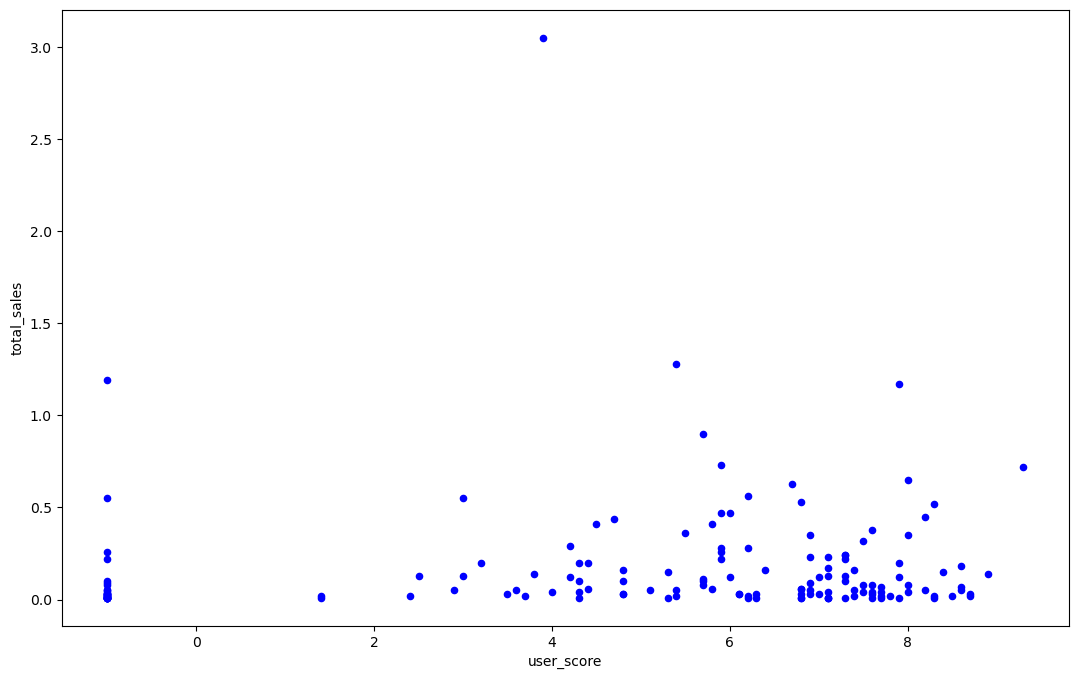

PS3
critic_score    0.446575
user_score      0.156595
total_sales     1.000000
Name: total_sales, dtype: float64


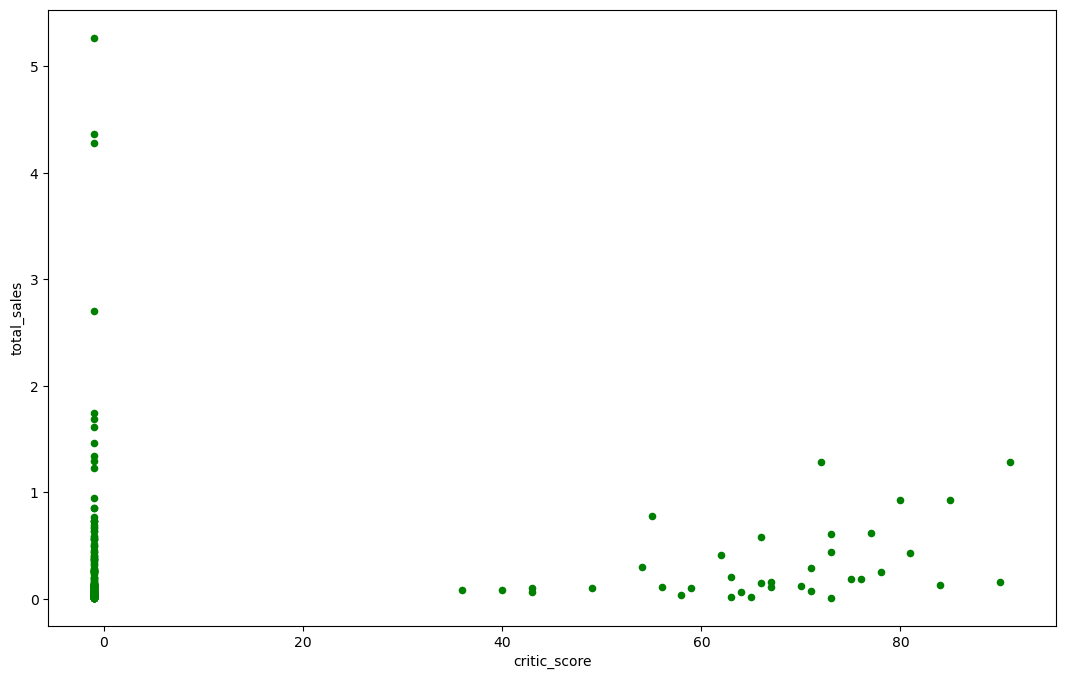

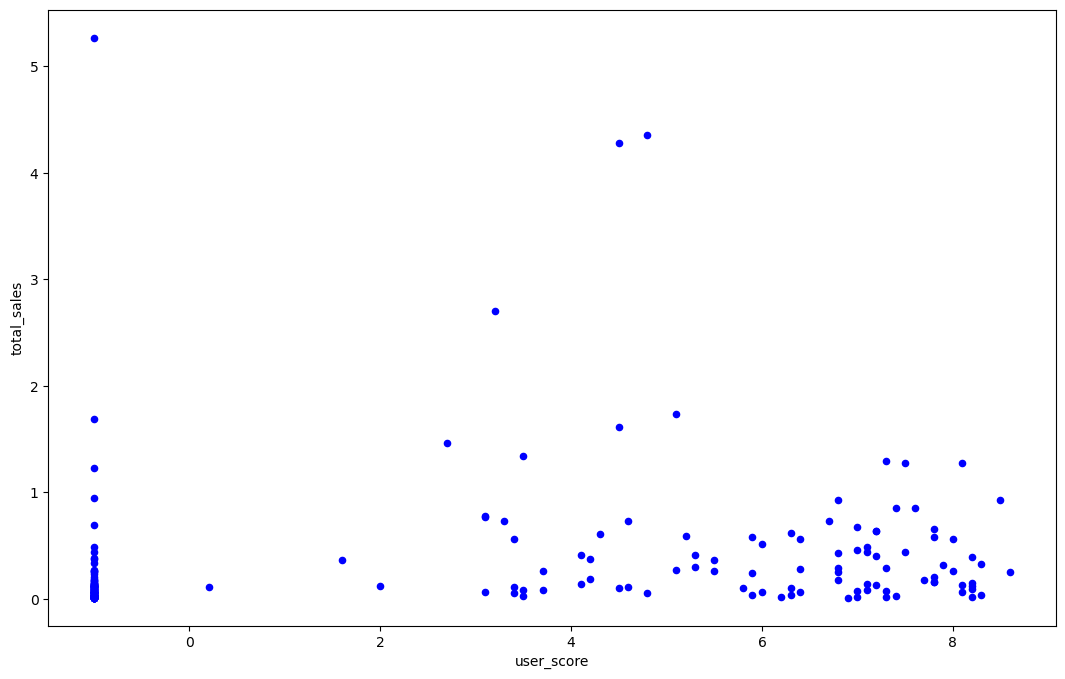

PS4
critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


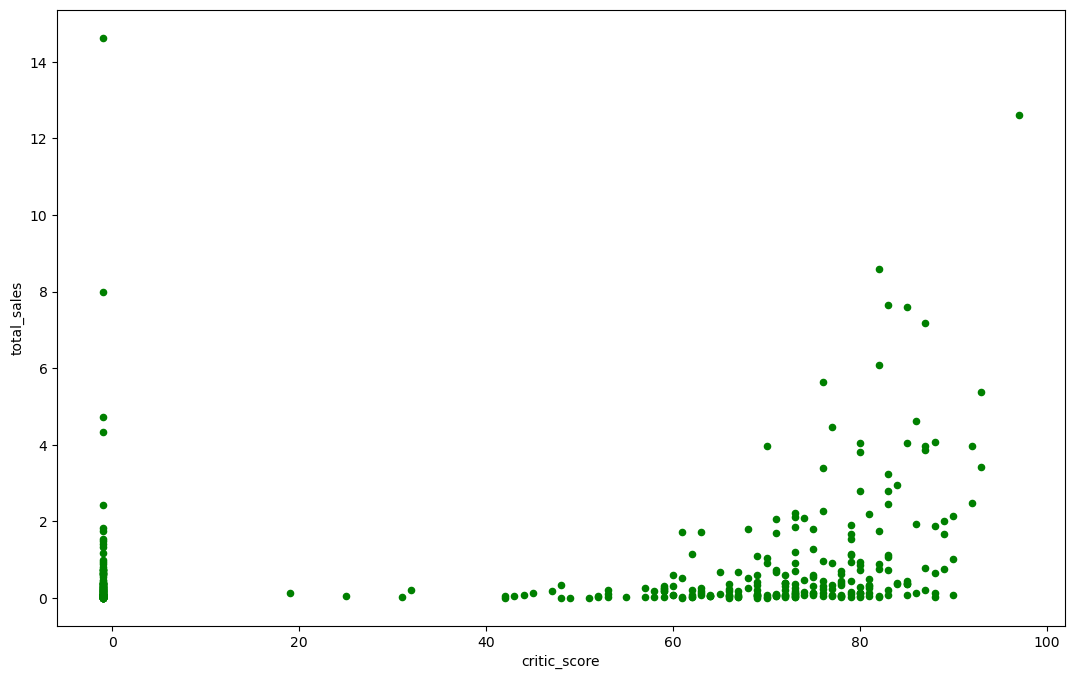

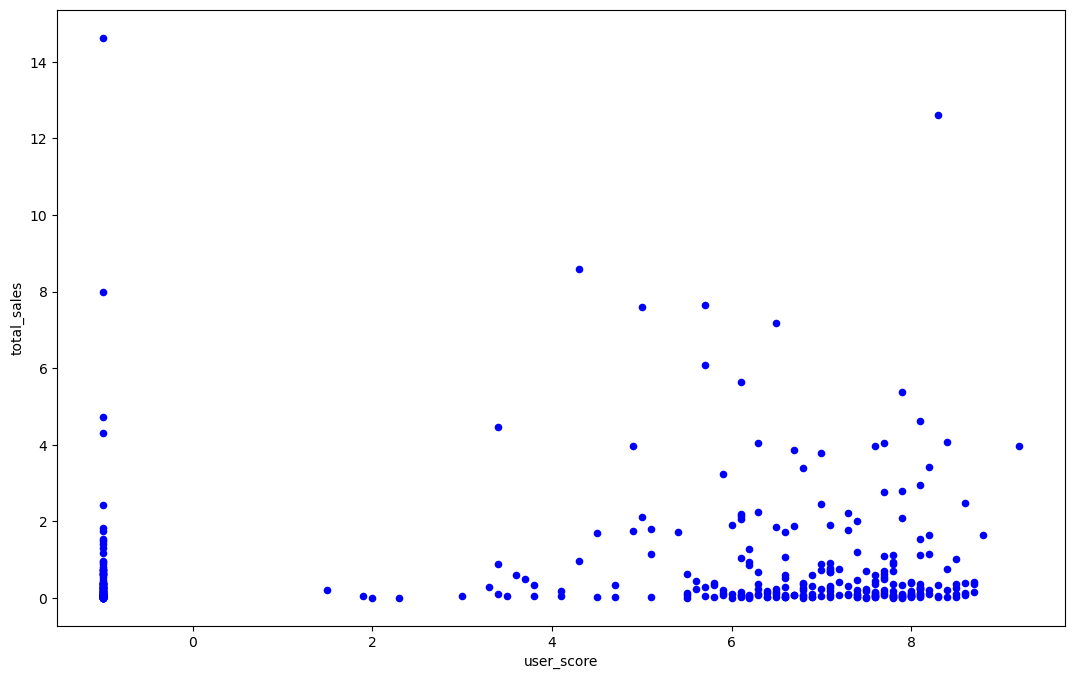

PSP
critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64


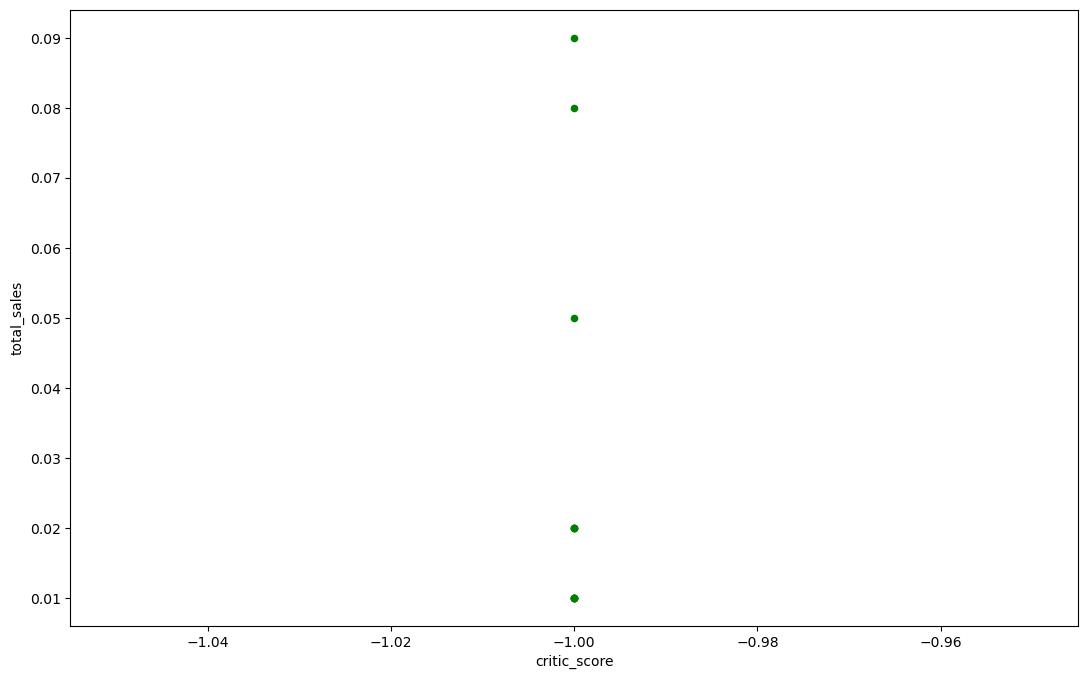

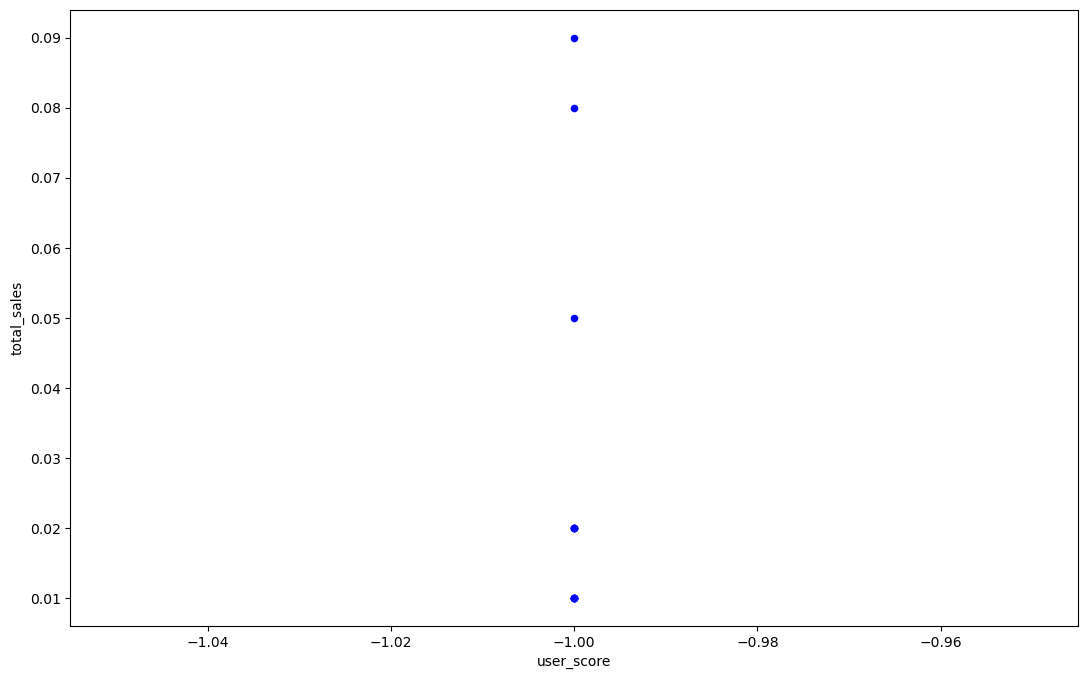

PSV
critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64


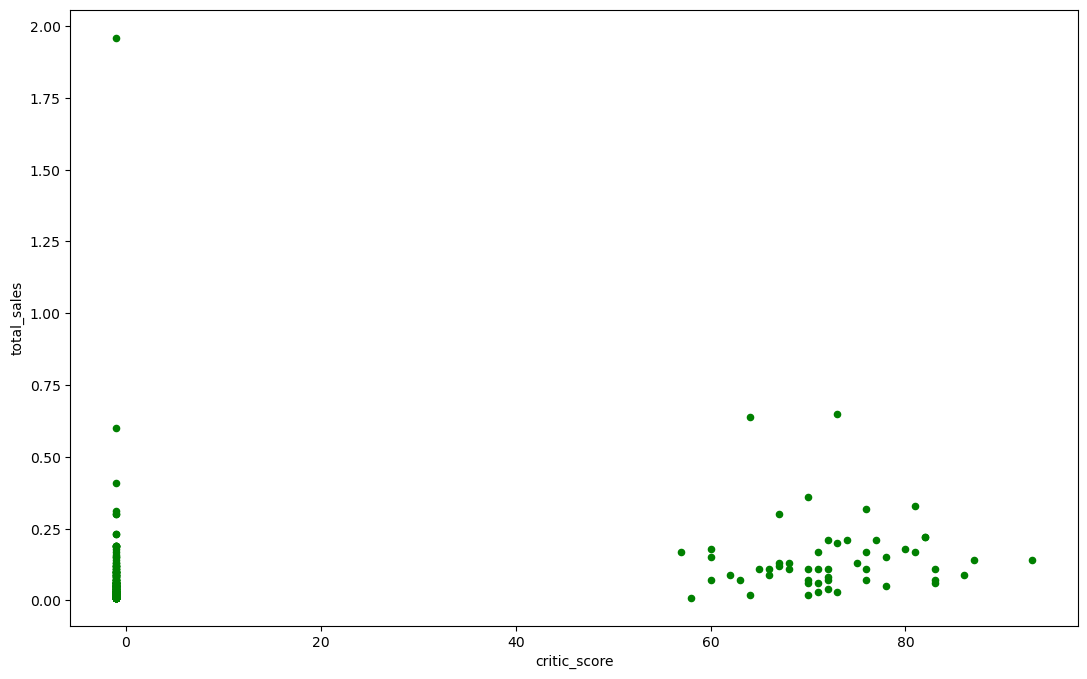

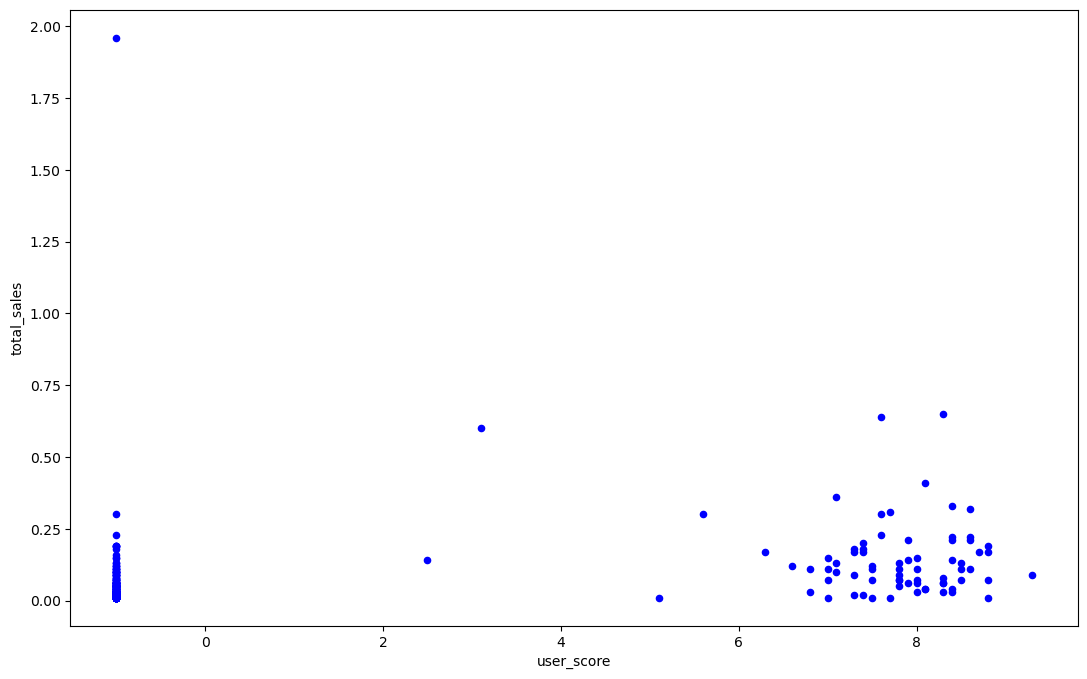

Wii
critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64


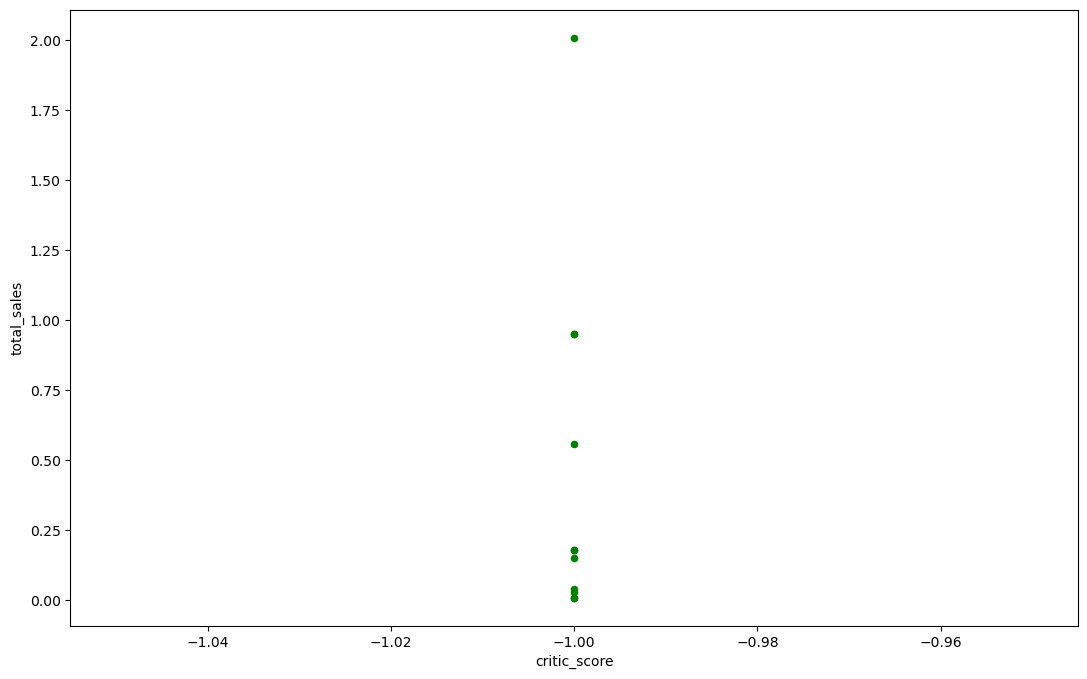

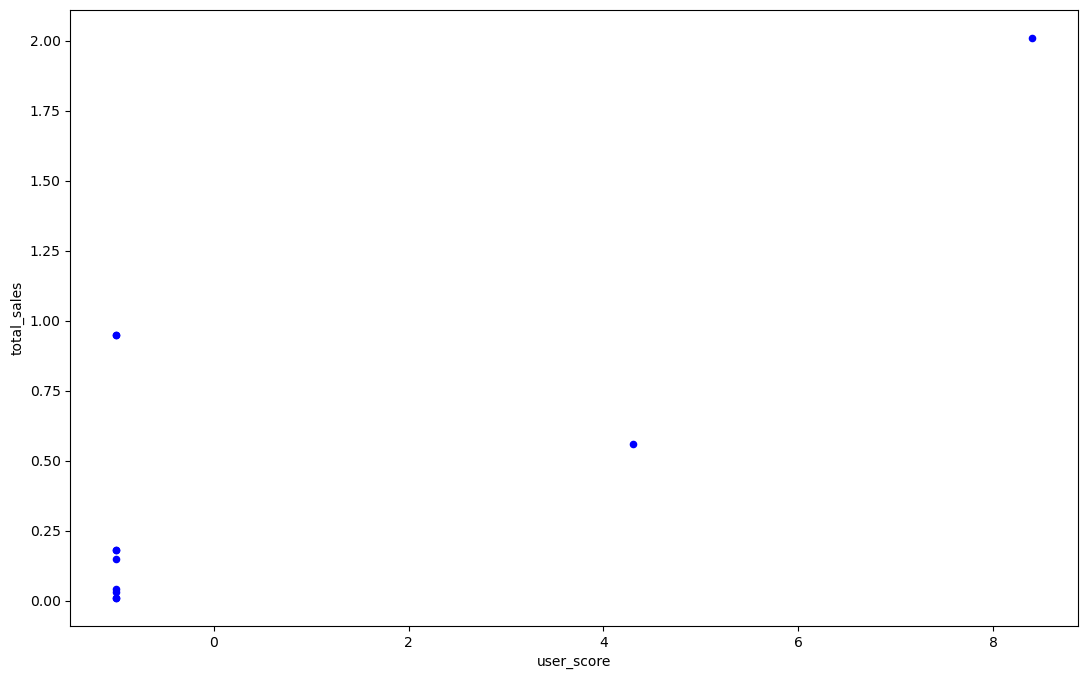

WiiU
critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64


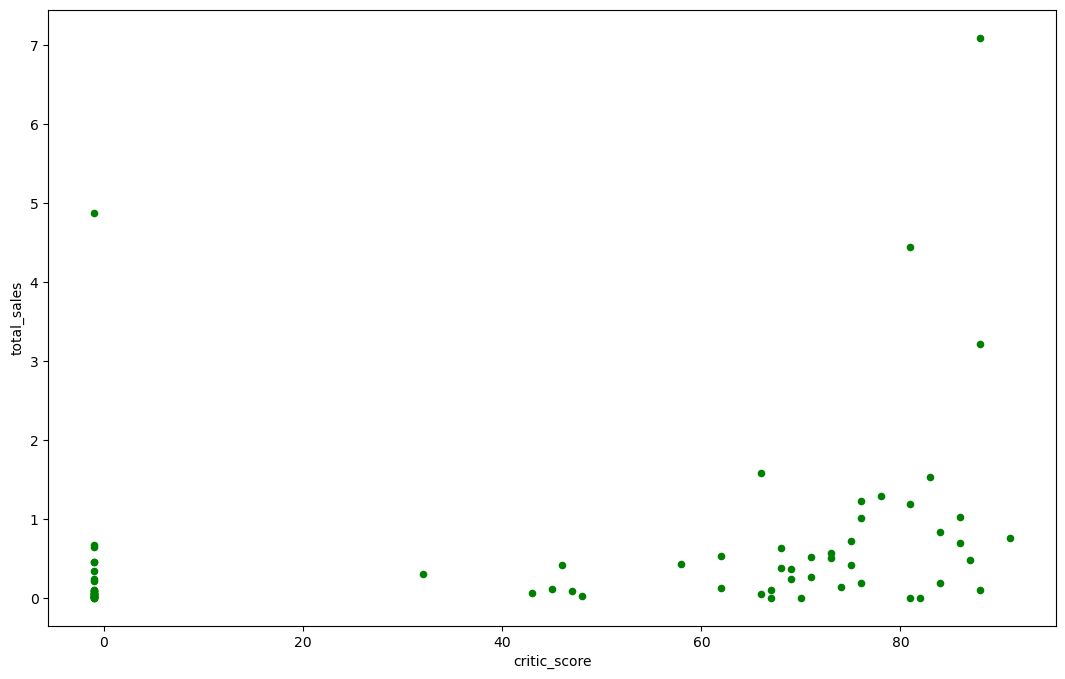

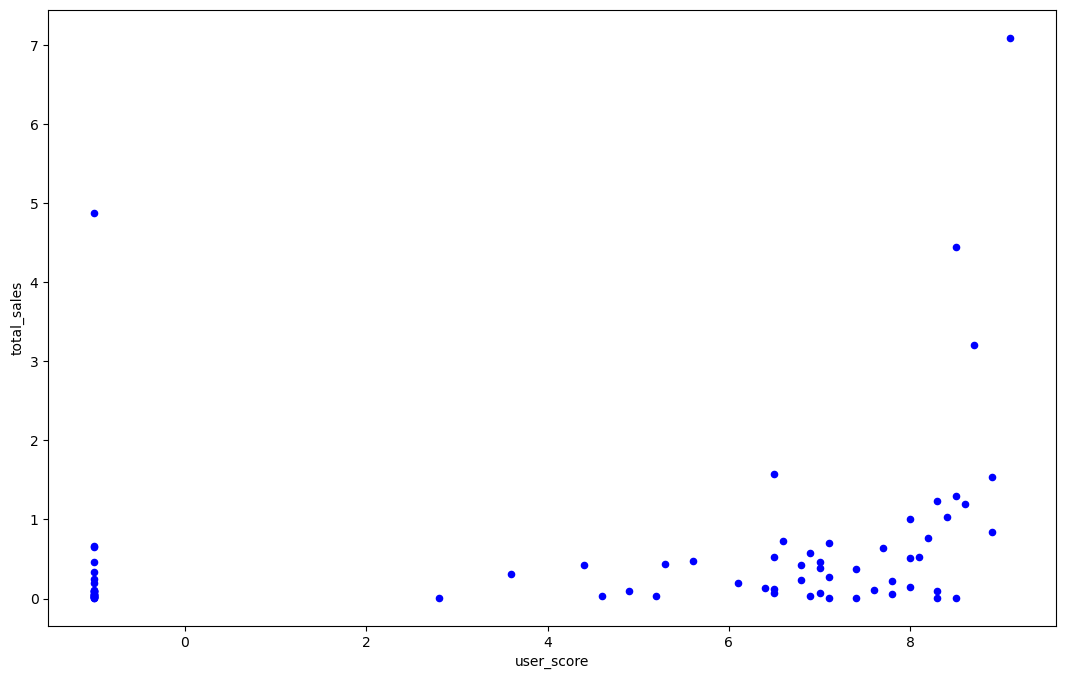

X360
critic_score    0.525723
user_score      0.336514
total_sales     1.000000
Name: total_sales, dtype: float64


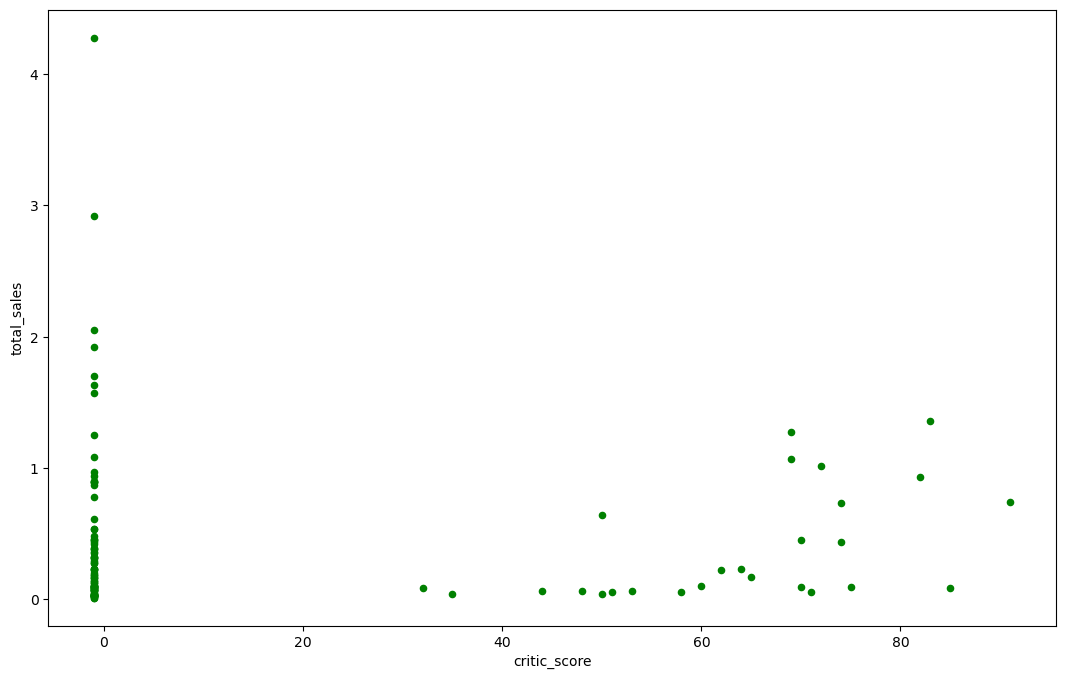

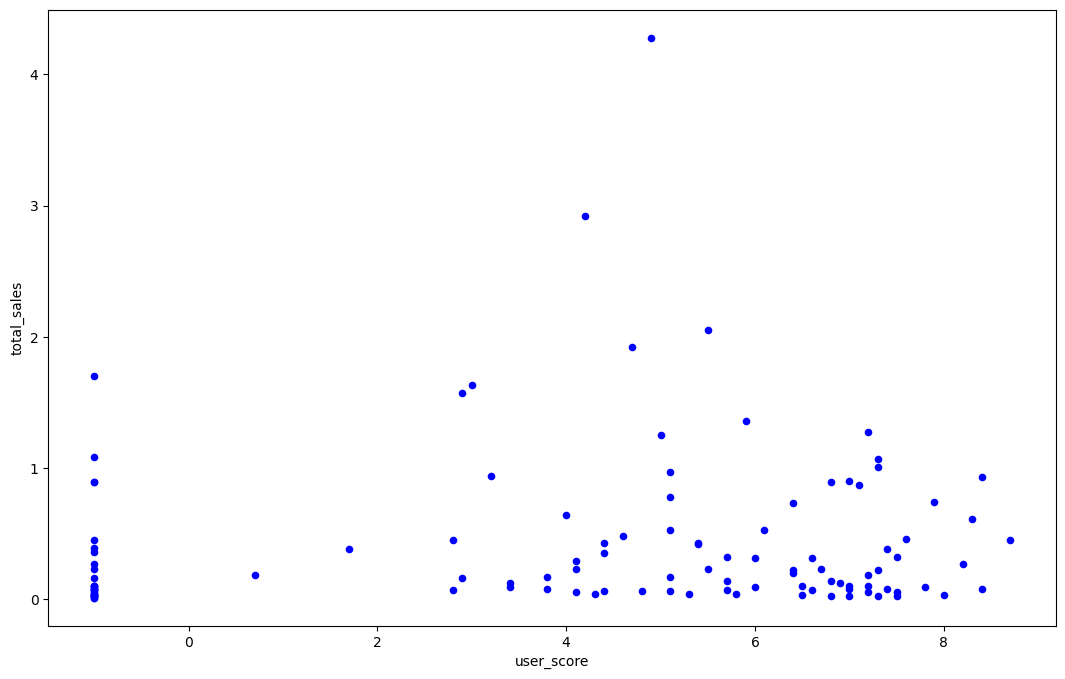

XOne
critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


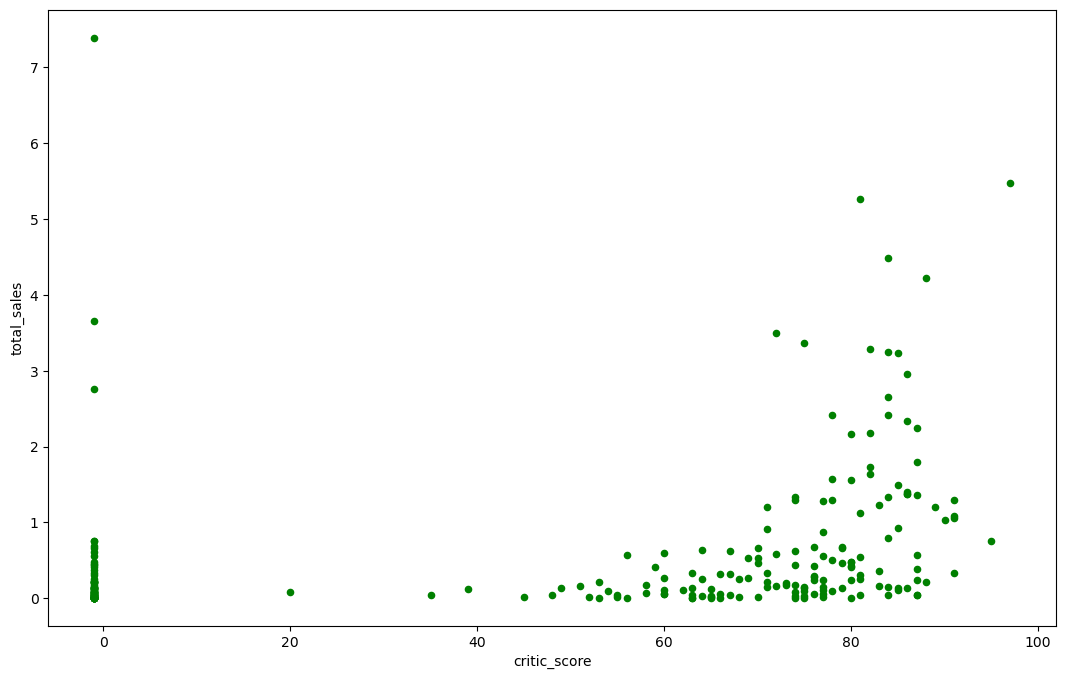

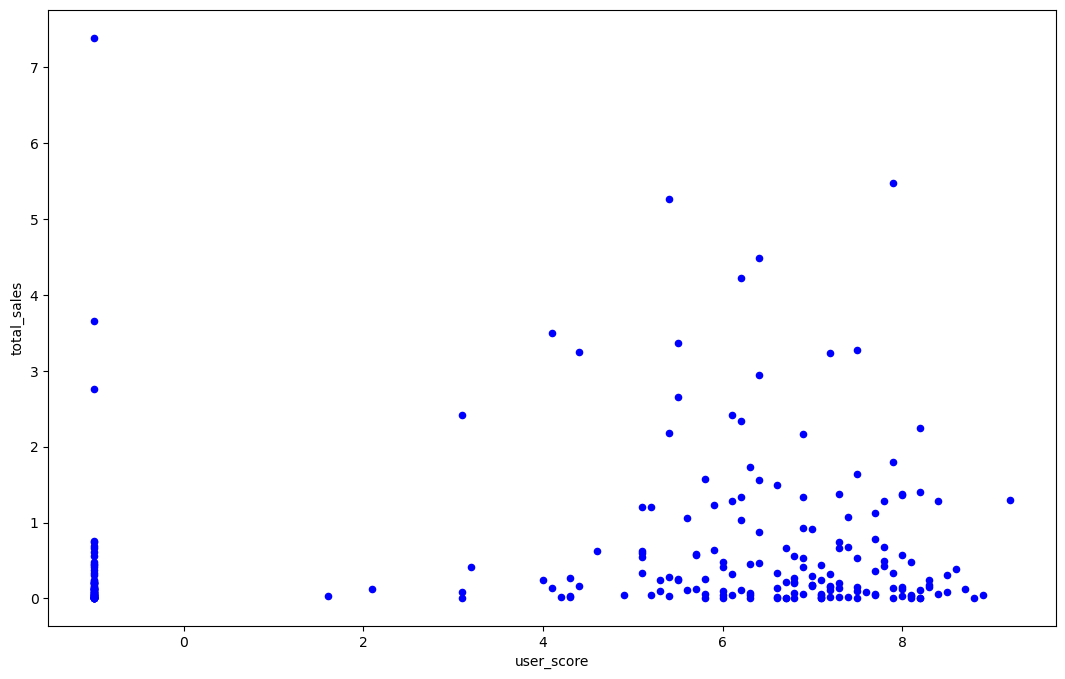

In [20]:
for platform, games in data.groupby('platform'):
    print(platform)
    print(games[['critic_score', 'user_score', 'total_sales']].query('critic_score > 0 and user_score > 0'
                                                                    ).corr()['total_sales'])
    games.plot(kind='scatter', x='critic_score', y='total_sales', color='green')
    games.plot(kind='scatter', x='user_score', y='total_sales', color='blue')
    plt.show()

Практически на всех платформах, где удалось рассчитать коэффечиент корреляции, он либо незначительный в обоих случаях, как с критиками, так и с пользователями, при этом коэффициент критиков всегда выше, либо поднимается до условно умеренного показателя, коэффициентом 3.5 и выше (при корреляции оценки критиков). Примерами таких платформ являются:
* DC
* PS
* PS2
* PS3
* PS4
* WiiU
* X360
* XB
* XOne

Рассмотрим самые прибыльные жанры игр среди пользователей.

In [21]:
# Создаем таблицу с самыми популярными жанрами
popular_genres = data.pivot_table(index='genre', values='total_sales', aggfunc='sum'
                                 ).sort_values(by='total_sales', ascending=False)
popular_genres

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


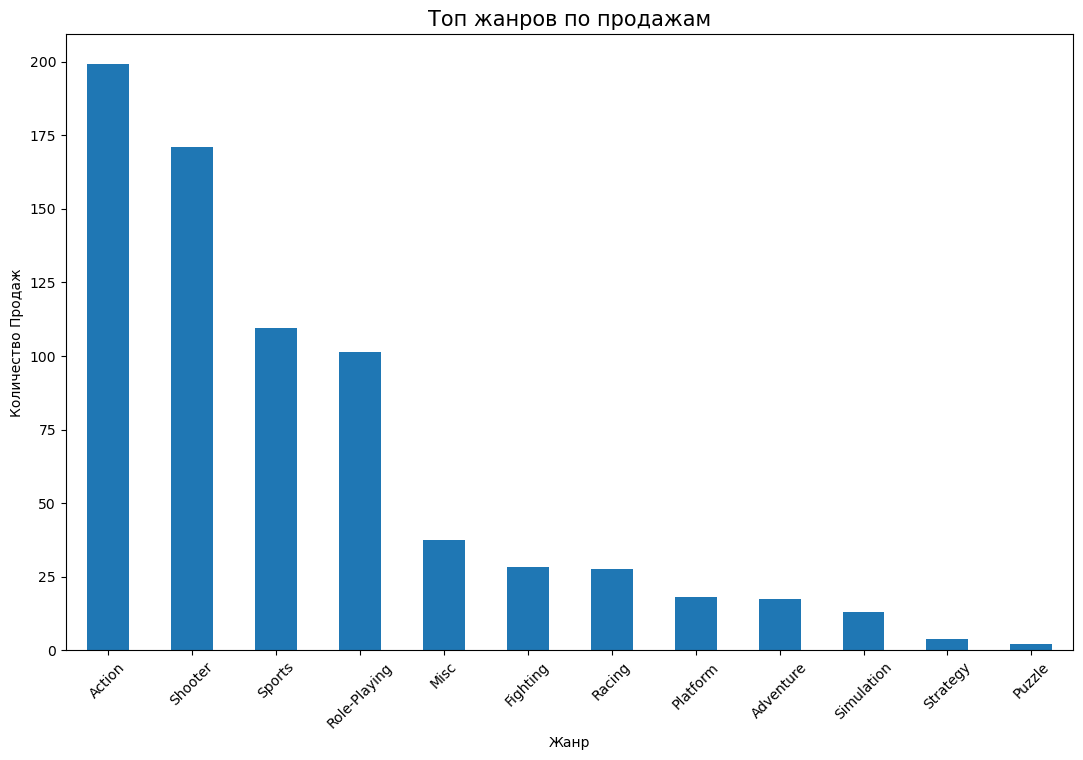

In [22]:
popular_genres.plot(kind='bar', legend='')
plt.title('Топ жанров по продажам', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество Продаж')
plt.xticks(rotation=45)
plt.show()

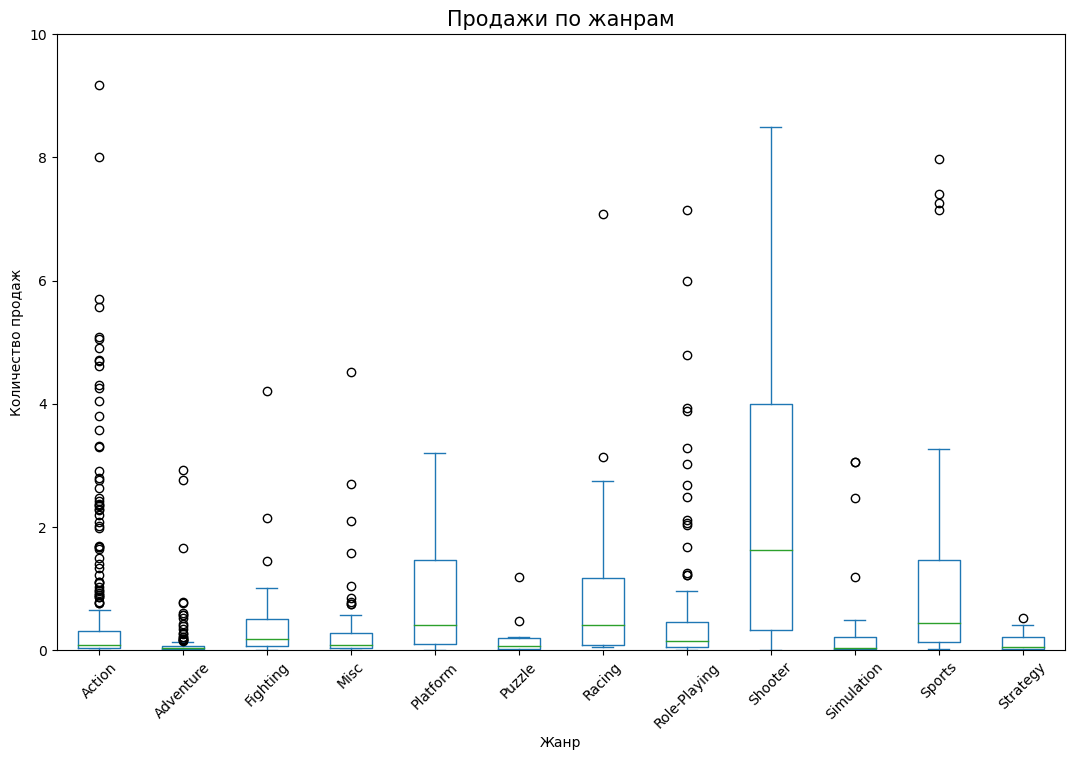

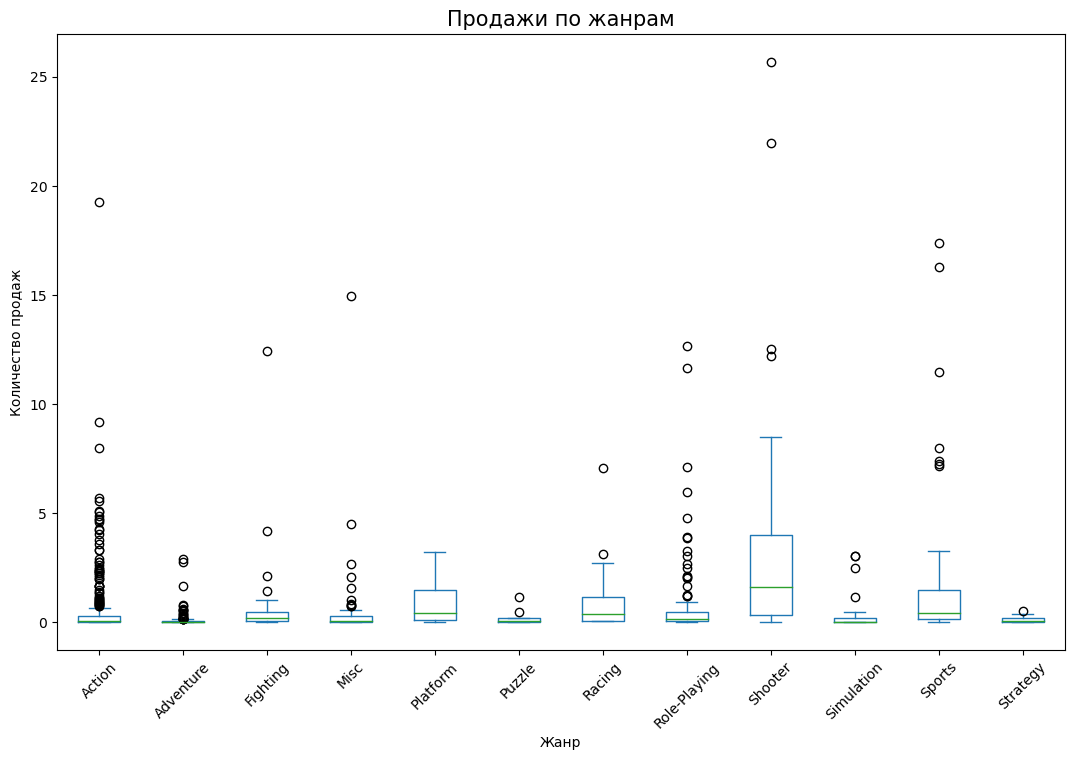

In [23]:
data.pivot_table(index='name', columns = 'genre', values = 'total_sales', aggfunc = 'sum'
                ).plot(kind='box', ylim=(0,10))
plt.title('Продажи по жанрам', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

data.pivot_table(index='name', columns = 'genre', values = 'total_sales', aggfunc = 'sum'
                ).plot(kind='box')
plt.title('Продажи по жанрам', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

В топ самых прибыльных жанров среди пользователей можно отнести:
* Action
* Shooter
* Role-Playing
* Sports

Наименее прибыльными жанрами игр оказались:
* Puzzle
* Strategy

На диаграмме размаха можно заметить, что у игр в жанре `Shooter` самая высокие медианные продажи среди остальных, у него не много выбросов, данный жанр является самым стабильным. Однако на общем графике видно, что по продажам все равно лидирует жанр `Action`. Вероятно, причиной этому послужило самое большое количество выбросов у данного жанра среди других, на диаграмме размаха. Также на обеих диаграммах видно, что `Puzzle` и `Strategy` остаются наименее прибыльными жанрами.

[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)

## Портрет пользователя в каждом регионе

На данном этапе мы рассмотрим:
* Самые популярные игровые платформы в каждом регионе
* Самые популярные жанры игр для каждого региона
* Влияет ли рейтинг игр на их продажи

### Самые популярные платформы

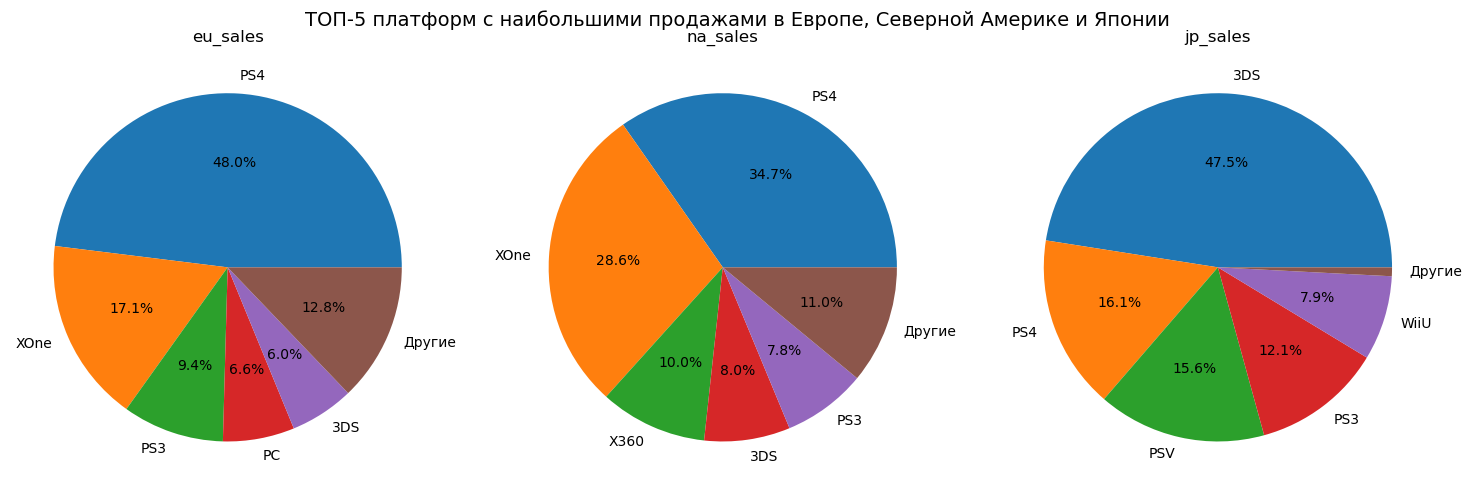

In [24]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))

for i, region in enumerate(regions_sales):
    region_platform = data.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'],
              autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
    
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе, Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

На данном графике видно, что ТОП-5 платформ в Европе и Северной Америке практически не меняется, за исключением одной платформы, меняется лишь доля продаж отдельных платформ, самыми популярными стали `PS4` и `Xone`, в обоих случаях они составляют 65% и 62% от продаж соответственно. В Японии же картина иная, почти половину от всех продаж занимает консоль `3DS`. Вероятно, дело в том, что эта консоль японского производства и сильно полюбилась местному населению.

### Самые популярные жанры

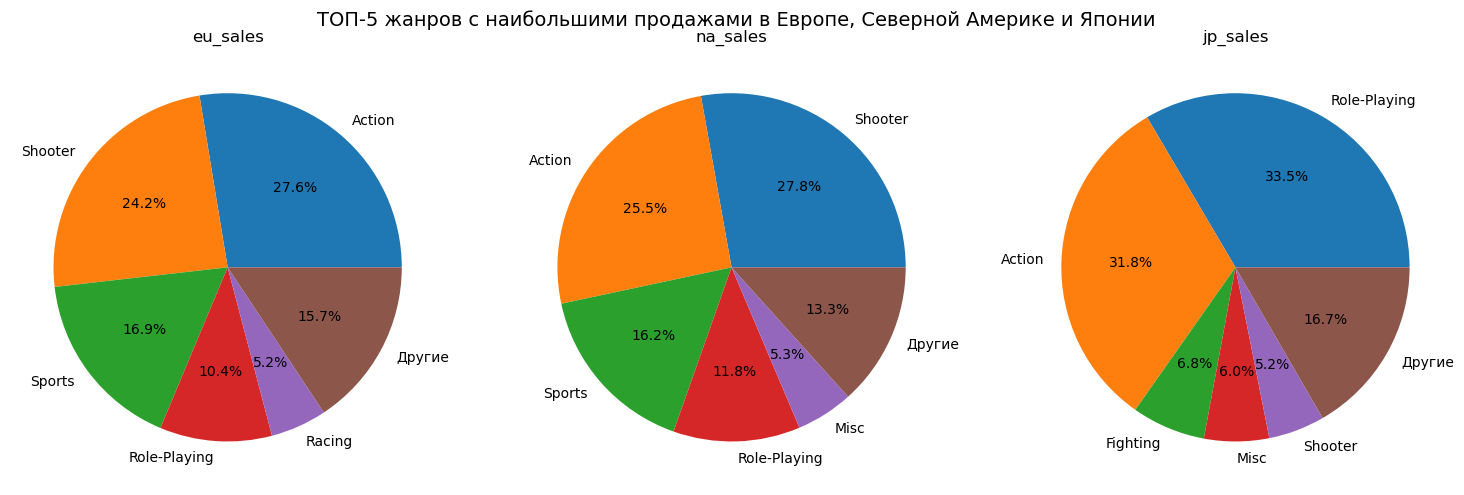

In [25]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))

for i, region in enumerate(regions_sales):
    region_genre = data.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_genre.loc[5] = ['Другие', region_genre.loc[5:][region].sum().round(2)]
    region_top_genre = region_genre.head(6)        
    ax[i].pie(region_top_genre[region], labels=region_top_genre['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
    
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе, Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

На данном графике, опять же, топ жанров у Европы и Америки похож, чего не скажешь о Японии. В Европе и Америке наиболее популярные жанры это экшен (25%-27%), шутеры (24%-27%) и спортивные игры (16%-17%), причем разница в долях продаж крайне мала, в Японии болшую долю рынка запимают РПГ и экшен, 33% и 32% соответственно.

### Самые распространенные рейтинги игр

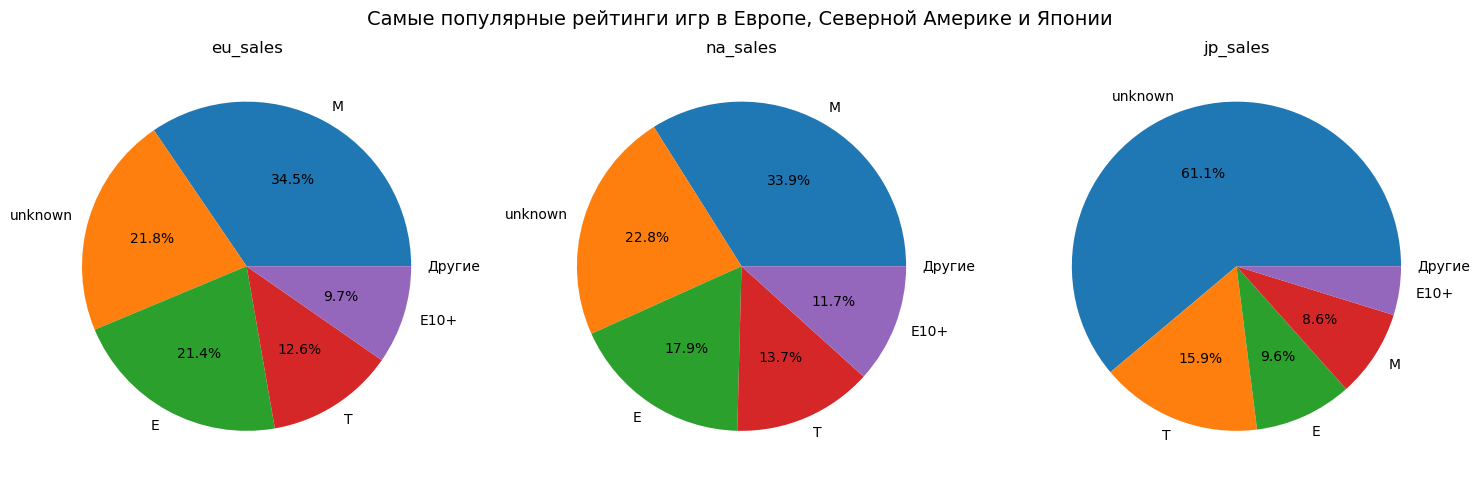

In [26]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))

for i, region in enumerate(regions_sales):
    region_rating = data.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_rating.loc[5] = ['Другие', region_rating.loc[5:][region].sum().round(2)]
    region_top_rating = region_rating.head(6)        
    ax[i].pie(region_top_rating[region], labels=region_top_rating['rating'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
    
plt.suptitle('Самые популярные рейтинги игр в Европе, Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

**Для начала посмотрим, что обозначают данные рейтинги, чтобы лучше понимать графики:**
* М - "Для взрослых", *предназначены для лиц старше 17 лет*;
* Т - "Подросткам", *для лиц старше 13 лет*;
* Е10+ - "Для всех от 10 и старше";
* Е - "Для всех", *игры подходятящие для всех возрастов*.

В Америке и Европе основная доля игр выпускается под рейтингом для возрослых (34%-35%), на втором месте игры, которым не был присвоен рейтинг (22%-23%), далее идут игры, подходящие под все возрастные категории (18%-21%). В Японии же больше половины игр выходят без рейтинга, вероятно это и есть японские игры, которым рейтинг просто не присваивается, поскольку данная система используется в основном в Канаде и Америке.

[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)

## Проверка гипотез

### Первая гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC равны

Для начала сформулируем нулевую и альтернативную гипотезы:

* Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны
* Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [27]:
# Создаем выборки, удаляем заглушки
xone_rating = data.query('year_of_release > 2014 and platform=="XOne" and user_score > 0')['user_score']
pc_rating = data.query('year_of_release > 2014 and platform=="PC" and user_score > 0')['user_score']

# Критический уровень статистической значимости
alpha=0.05

results = st.ttest_ind(xone_rating, pc_rating)

print('P-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-значение 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Судя по результату, данные не противоречат гипотезе. P-значение получилось равно 0.2778, что означает вероятность события при нулевой гепотезе около 27%, а это значит, что с этой вероятностью такое или большее различие можно получить случайно. В связи с этим мы не можем отвергнуть предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Вторая гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:
* Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны
* Н1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [28]:
# Создаем выборки, удаляем заглушки
action_rating = data.query('year_of_release > 2014 and genre=="Action" and user_score > 0')['user_score']
sports_rating = data.query('year_of_release > 2014 and genre=="Sports" and user_score > 0')['user_score']

# Критический уровень статистической значимости
alpha=0.05

results = st.ttest_ind(action_rating, sports_rating)

print('P-значение', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

P-значение 1.0012846807938657e-13
Отвергаем нулевую гипотезу


В данном случае мы не можем получить данные в рамках нулевой гипотезы, поэтому предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, мы отвергнуть также не можем.

[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)

## Общие выводы

По итогу проделанной работы мы можем сформулировать выводы по нескольким пунктам:

**Изучение и предобработка данных:**
* Преобразованы название столбцов
* Устранены пропуски в данных и заменен их тип
* Посчитаны суммарные продажи во всех регионах

**Исследовательский анализ данных**
* Рост развития индустрии компьютерных игр начался в 1994 году, а его пик пришелся на 2002-2011 годы.
* Самыми популярными платформами за все время стали:
    * PS2
    * X360
    * PS3
    * Wii
    * DS
    * PS
* Средний период жизни консоли составляет 9-10 лет
* Наиболее продаваемыми платформами к 2016 году стали `PS4`, `XOne`,`3DS` и `PC`. Наименее: `PS3`, `X360`.
* Оценки пользователей и критиков практически не влияют на продажи игр среди разных платформ.
* Самыми продаваемыми жанрами игр стали:
    * Action
    * Shooter
    * Role-Playing
    * Sports

**Портрет пользователя каждого региона:**
* Самая популярная платформа для Европы и Америки - `PS4`, для Японии - `3DS`.
* Самые популярные жанры для Америки и Европы - `Action` и `Shooter`, для Японии - `Role-playing` и `Action`.
* В Европе и Америке чаще всего играют в игры с рейтингом "Для взрослых" или в игры без рейтинга. В Японии рейтинг не определен для большинства игр.
* Средние пользовтели в Европе и Америки во многом совпадают по предпочтениям.

**Проверка гипотез**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. *Гипотезу не получилось отвергнуть*.
* Средние пользовательские рейтинги жанров Action и Sports разные. *Гипотезу не получилось отвергнуть*.




[Начало страницы](#Исследование-рынка-компьютерных-игр-и-игровых-платформ)